In [ ]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
!pip install tabulate colorama

**Ecuaciones de Wilson**
\begin{equation}
\Lambda_{ij}=\frac{V_{j}}{V_{i}}\exp{\frac{-a_{ij}}{RT}}
\end{equation}

\begin{equation}
\ln\gamma_{1}=-\ln(x_{1}+x_{2}\Lambda_{12})+x_{2}(\frac{\Lambda_{12}}{x_{1}+x_{2}\Lambda_{12}}-\frac{\Lambda_{21}}{x_{2}+x_{1}\Lambda_{21}})
\end{equation}

\begin{equation}
\ln\gamma_{2}=-\ln(x_{2}+x_{1}\Lambda_{21})-x_{1}(\frac{\Lambda_{12}}{x_{1}+x_{2}\Lambda_{12}}-\frac{\Lambda_{21}}{x_{2}+x_{1}\Lambda_{21}})
\end{equation}


Volumen Benceno: 95.6961 cm3/gmol Volumen Acetona: 76.1888 cm3/mol
Pv Benceno: 741.9816 mmHg Pv Acetona: 1575.5258 mmHg
Lambda1211: 1.0460 && Lambda2122: 0.5849
Tabla de composiciones con colores:
+----+-------+-------+------------+-----------+---------+---------+-------------+-------------+---------+│
|    |   X_1 |   X_2 |        Y_1 |       Y_2 |   Act_1 |   Act_2 |   P1 (mmHg) |   P2 (mmHg) |   T (K) |│
+====+=======+=======+============+===========+=========+=========+=============+=============+=========+│
|  0 |  0.01 |  0.99 | 0.00654149 | 0.993459  | 1.44539 | 1.00003 |     4.97153 |    755.028  | 329.538 |│
+----+-------+-------+------------+-----------+---------+---------+-------------+-------------+---------+│
|  1 |  0.02 |  0.98 | 0.0130599  | 0.98694   | 1.4375  | 1.00011 |     9.92553 |    750.074  | 329.641 |│
+----+-------+-------+------------+-----------+---------+---------+-------------+-------------+---------+│
|  2 |  0.03 |  0.97 | 0.0195561  | 0.980444  | 1.4296

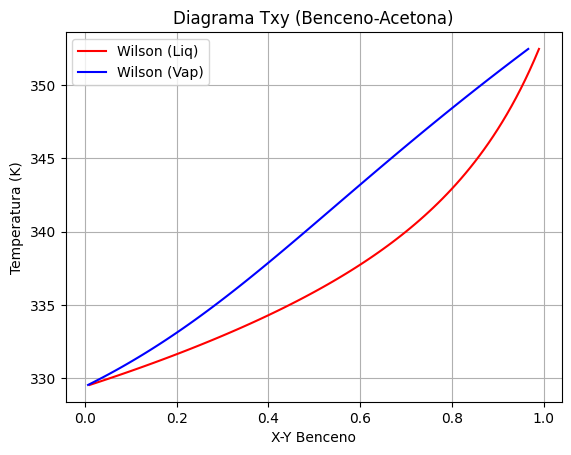

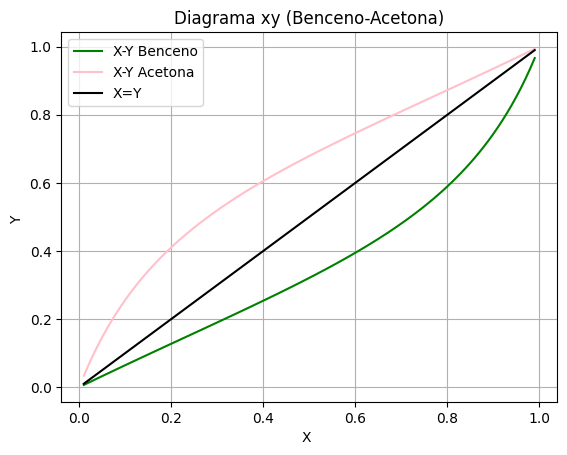

In [ ]:
from math import exp,log,fabs
import pandas as pd
from tabulate import tabulate
from colorama import Fore, Style
import matplotlib.pyplot as plt
def v(a,b,c,T): #Polinomio de volumen molar en función de la temperatura
  return a+(b*T)+(c*(T**2))

def lamba(v1,v2,wilson,T):
  return (v2/v1)*exp(-wilson/(R*T))

def actividad1(x1,x2,lambda12,lambda21): #Función de Wilson
  return exp(-log(x1+lambda12*x2)+x2*((lambda12/(x1+lambda12*x2))-(lambda21/(lambda21*x1+x2))))

def actividad2(x1,x2,lambda12,lambda21):
  return exp(-log(x2+lambda21*x1)-x1*((lambda12/(x1+lambda12*x2))-(lambda21/(lambda21*x1+x2))))

def Antoine(A,B,C,T): #Ecuación de Antoine
  return 10**(A-(B/(T+C)))



def g(p0,p1,fx1,fx0):
  return p1-(fx1*(p1-p0))/(fx1-fx0)

C_Benceno=[6.90565,1211.033,220.79]
C_Acetona=[7.2316,1277.03,237.23]
x1=[]
for i in range(99):
  x1.append(0.01*(i+1))
x2=[]
act1=[]
act2=[]
y1=[]
y2=[]
PT=[]
TRaoult=[]
yRaoult=[]
Pp1=[]
Pp2=[]
ALFA=[]
T=[]
P=760 #mmHg
az=[]
n=len(x1)
for i in range(n):
  x2.append(1-x1[i])

R=1.987 #cal/mol K
v_Benceno=[70.56279,0.01491,0.00016] #Coeficiente del polinomio de volumen molar
v_Acetona=[30.35427,0.22168,-0.00026]

wilson1211=-191.16 #cal/gmol
wilson2122=535.22 #cal/gmol

TOL=0.0001
M=1000
p0=323.15
p1=325.15
Tz=[]
for i in range(n):
  for j in range(M):
    Pv_Bencenox=Antoine(C_Benceno[0],C_Benceno[1],C_Benceno[2],p0-273.15)
    Pv_Acetonax=Antoine(C_Acetona[0],C_Acetona[1],C_Acetona[2],p0-273.15)
    v1x=v(v_Benceno[0],v_Benceno[1],v_Benceno[2],p0)
    v2x=v(v_Acetona[0],v_Acetona[1],v_Acetona[2],p0)
    lambda12x=lamba(v1x,v2x,wilson1211,p0)
    lambda21x=lamba(v2x,v1x,wilson2122,p0)
    gamma1x=actividad1(x1[i],x2[i],lambda12x,lambda21x)
    gamma2x=actividad2(x1[i],x2[i],lambda12x,lambda21x)
    P1x=gamma1x*x1[i]*Pv_Bencenox
    P2x=gamma2x*x2[i]*Pv_Acetonax
    Pptx=P1x+P2x-P
    Pv_Bencenoy=Antoine(C_Benceno[0],C_Benceno[1],C_Benceno[2],p1-273.15)
    Pv_Acetonay=Antoine(C_Acetona[0],C_Acetona[1],C_Acetona[2],p1-273.15)
    v1y=v(v_Benceno[0],v_Benceno[1],v_Benceno[2],p1)
    v2y=v(v_Acetona[0],v_Acetona[1],v_Acetona[2],p1)
    lambda12y=lamba(v1y,v2y,wilson1211,p1)
    lambda21y=lamba(v2y,v1y,wilson2122,p1)
    gamma1y=actividad1(x1[i],x2[i],lambda12y,lambda21y)
    gamma2y=actividad2(x1[i],x2[i],lambda12y,lambda21y)
    P1y=gamma1y*x1[i]*Pv_Bencenoy
    P2y=gamma2y*x2[i]*Pv_Acetonay
    Ppty=P1y+P2y-P
    p=g(p0,p1,Ppty,Pptx)
    if fabs(p-p1)<TOL:
      break
    else:
      p0=p1
      p1=p

  T.append(p0)
  act1.append(actividad1(x1[i],x2[i],lambda12y,lambda21y))
  act2.append(actividad2(x1[i],x2[i],lambda12y,lambda21y))
  Pp1.append(act1[i]*x1[i]*Pv_Bencenoy)
  Pp2.append(act2[i]*x2[i]*Pv_Acetonay)
  #PRaoult.append(x1[i]*Pv_Benceno+x2[i]*Pv_Acetona)PT.append(Pp1[i]+Pp2[i])
  y1.append(act1[i]*x1[i]*Pv_Bencenoy/P)
  y2.append(act2[i]*x2[i]*Pv_Acetonay/P)
  K2=y1[i]/x1[i]
  K1=y2[i]/x2[i]
  ALFA.append(K1/K2)
  #yRaoult.append(x1[i]*Pv_Benceno/PRaoult[i])
  if fabs(y1[i]-x1[i])<0.005:
    az.append(x1[i])
    Tz.append(T[i])
  else:
    continue

print("Volumen Benceno: %.4f cm3/gmol Volumen Acetona: %.4f cm3/mol"%(v1y,v2y))
print("Pv Benceno: %.4f mmHg Pv Acetona: %.4f mmHg"%(Pv_Bencenoy,Pv_Acetonay))
print("Lambda1211: %.4f && Lambda2122: %.4f"%(lambda12y,lambda21y))




data = {
  "X_1": x1,
  "X_2": x2,
  "Y_1": y1,
  "Y_2": y2,
  "Act_1":act1,
  "Act_2":act2,
  "P1 (mmHg)":Pp1,
  "P2 (mmHg)":Pp2,
  "T (K)":T


}

df = pd.DataFrame(data)

table = tabulate(df, headers='keys', tablefmt='grid')

colored_table = ""
for line in table.split('\n'):
    colored_line = ""
    for item in line.split('│'):
        if item.strip().replace('.', '', 1).isdigit():
            value = float(item.strip().replace('│', ''))
            if value < 0.5:
                colored_line += Fore.RED + item + Style.RESET_ALL + '│'
            else:
                colored_line += Fore.GREEN + item + Style.RESET_ALL + '│'
        else:
            colored_line += item + '│'
    colored_table += colored_line + '\n'

print("Tabla de composiciones con colores:")
print(colored_table)

#print("Se encontró un azeótropo en x1: %.4f a %.4f K"%(az[1],Tz[1]))

plt.plot(x1,T, color='red', label='Wilson (Liq)')
plt.plot(y1,T, color='blue', label='Wilson (Vap)')



plt.xlabel('X-Y Benceno')
plt.ylabel('Temperatura (K)')
plt.title('Diagrama Txy (Benceno-Acetona)')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x1,y1, color='green', label='X-Y Benceno')
plt.plot(x2,y2, color='pink', label='X-Y Acetona')
plt.plot(x1,x1,color='black',label='X=Y')


plt.xlabel('X ')
plt.ylabel('Y ')
plt.title('Diagrama xy (Benceno-Acetona)')
plt.legend()
plt.grid(True)
plt.show()


alfa_coefx=np.polyfit(x2,ALFA,10) #Se ajustan los puntos por medio de un ajuste polinómico
alfa_coefy=np.polyfit(y2,ALFA,10)


#alfa_polix=np.polyval(alfa_coefx,x)
#alfa_poliy=np.polyval(alfa_coefy,y)


# DATOS DE EQUILIBRIO----------------------------------------------
x=np.arange(0,1.01,0.01)
alfa_x=np.polyval(alfa_coefx,x)
y=(alfa_x*x)/(1+x*(alfa_x-1))


Se desea separar una mezcla de acetona-benceno que se alimenta a 75 kmol/h.
* *Fracción en alimentación*: 0.45
* *Pureza destilado*: 0.95
* *Pureza fondos: 0.05
* *Razón de reflujo*: 2.9

De acuerdo a los resultados del Método de Wilson, la temperatura de burbuja de la mezcla es de 65°C.

Se proponen varios casos de alimentación:
* Líquido saturado
* Líquido frío a 25°C
* Mezcla de 40% líquido y 60% vapor
* Vapor saturado
* Vapor sobrecalentado a 100°C

# **LÍQUIDO FRÍO (POR DEBAJO DE LA LÍNEA DE SATURACIÓN)**

1.183976676794369
Flujo del destilado: 33.333333 kmol/h
Flujo residual: 41.666667 kmol/h
Flujo de vapor: 143.798251 kmol/h
Flujo de líquido: 96.666667 kmol/h
Número de etapas: 13
Plato de alimentación: 9


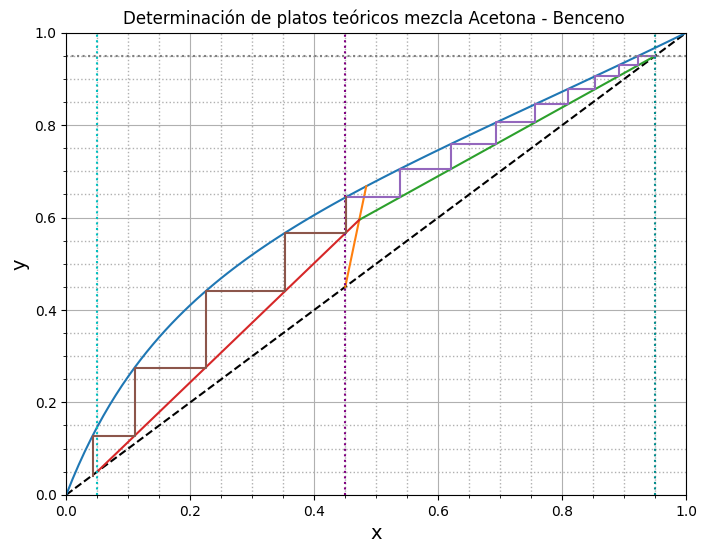

In [ ]:
comp1='Acetona'
comp2='Benceno'
# Acetona , Benceno
C1 = [4.215e+7, 4.536e+7]
C2 = [0.3397, 0.39053]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.05, 562.2]         # Temperatura crítica en K
pm = [58.08 , 78.114]       # Peso molecular
T = 273.15+65              # Temperatura del sistema en K

tF=25     #°C
tburbuja = 66
z=0.45 #Fracción de alimentación
F=75   # kmol/h
R=2.9 #Razón de reflujo
xD=0.95 #Pureza del destilado
xB=0.05 #Pureza de los fondos

#BALANCE DE MATERIA
B = ((F*z)-(F*xD))/(xB-xD)    # fondos
D = F-B                       # destilado

n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)

for i in range (n):
    Tr[i] = T/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)
    CL[i] = Hv[i]/4184

CL_prom = (z*CL[0]) + ((1-z)*CL[1])
PMF = 100 / ((z*100/pm[0])+(1-z)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
Lmda = CL_prom/PMF  # Calor latente de vaporización de la alimentación (cal/g)

def cp_acetona(T): # cal/g°C
  cof=[0.123,1.86e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 1
  return (cp)
def cp_benceno(T):
  cof=[0.1265,2.34e-5,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 2
  return (cp)

cp1 = cp_acetona(T)
cp2 = cp_agua(T)
cptotal = (cp1+cp2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros


q = 1 + ((cptotal*(tburbuja-tF))/Lmda) #Cálculo de q para una alimentación fría (no saturada)
print(q)

# CÁLCULO DE PUNTO PINCH
#línea de referencia
if q==1:   #Líquido saturado
    xP=z
    alfa=np.polyval(alfa_coefx,xP)
    yP=(alfa*xP)/(1+xP*(alfa-1))

if q==0:   #Vapor saturado
    yP=z
    alfa=np.polyval(alfa_coefy,yP)
    xP=yP/(alfa-(yP*(alfa-1)))
#-----------------------------------
else:
    i=1
    xit=0
    tol=0.0005
    e=1
    while e>tol:
        alfa=np.polyval(alfa_coefx,xit)
        xP=((alfa-1)*(z+q)-alfa+(((alfa-1)*(z+q)-alfa)**2+(4*z*(alfa-1)*q))**0.5)/(2*(alfa-1)*q)
        yP=(alfa*xP)/(1+xP*(alfa-1))
        alfa1=np.polyval(alfa_coefx,xP)
        e=abs(alfa1-alfa)
        xit=xP
        i=i+1
#----------------------------------------

xpinch=[z,xP]
ypinch=[z,yP]

xint=(z*(R+1)+xD*(q-1))/(q*(R+1)-R*(q-1)) #Cálculo del punto de intersección
yint=(R*xint/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
S=(xint-xB)/(yint-xint) #Cálculo de la razón S


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor: %f kmol/h' %V)
print('Flujo de líquido: %f kmol/h' %L)


ms=(xD-yint)/(xD-xint)
xrec=np.linspace(xint,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms*xrec)+(xD/(R+1))
mi=(yint-xB)/(xint-xB)
xag=np.linspace(xB,xint,50) #Cálculo de la línea de operación de la zona de agotamiento
yag=(mi*xag)-(xB/S)


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0


while yr>yint: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XR[-2]
ya=YR[-2]
XA=np.array([xa])
YA=np.array([ya])




while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(mi*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch,ypinch)
plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(XR,YR)
axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch[0], color='purple', ls="dotted", label = 'XF')
axvline(xB, color='c', ls="dotted", label = 'XR')
plt.plot(XA,YA)

plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación: %i' %p_alim)

# **LÍQUIDO SATURADO**

1.0
Flujo del destilado: 33.333333 kmol/h
Flujo residual: 41.666667 kmol/h
Flujo de vapor: 130.000000 kmol/h
Flujo de líquido: 96.666667 kmol/h
Número de etapas: 14
Plato de alimentación: 10


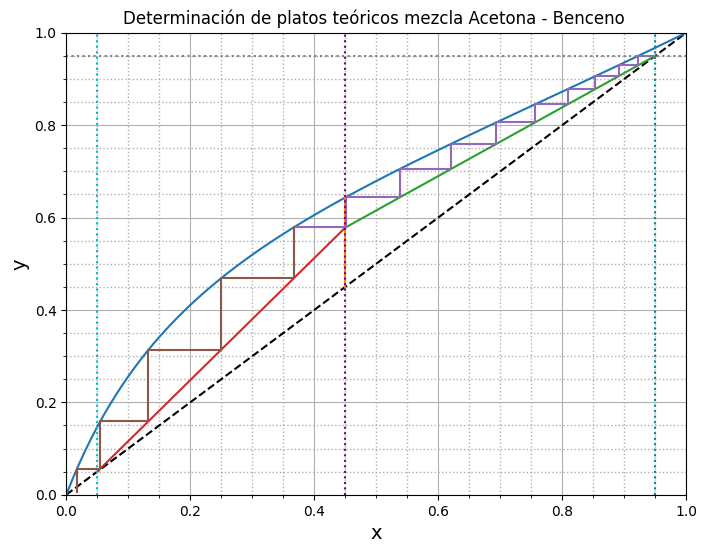

In [ ]:
comp1='Acetona'
comp2='Benceno'
# Acetona , Benceno
C1 = [4.215e+7, 4.536e+7]
C2 = [0.3397, 0.39053]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.05, 562.2]         # Temperatura crítica en K
pm = [58.08 , 78.114]       # Peso molecular
T = 273.15+66              # Temperatura del sistema en K

tF=66     #°C
tburbuja = 66
z=0.45 #Fracción de alimentación
F=75   # kmol/h
R=2.9 #Razón de reflujo
xD=0.95 #Pureza del destilado
xB=0.05 #Pureza de los fondos

#BALANCE DE MATERIA
B = ((F*z)-(F*xD))/(xB-xD)    # fondos
D = F-B                       # destilado

n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)

for i in range (n):
    Tr[i] = T/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)
    CL[i] = Hv[i]/4184

CL_prom = (z*CL[0]) + ((1-z)*CL[1])
PMF = 100 / ((z*100/pm[0])+(1-z)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
Lmda = CL_prom/PMF  # Calor latente de vaporización de la alimentación (cal/g)

def cp_acetona(T): # cal/g°C
  cof=[0.123,1.86e-4,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 1
  return (cp)
def cp_benceno(T):
  cof=[0.1265,2.34e-5,0,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 2
  return (cp)

cp1 = cp_acetona(T)
cp2 = cp_agua(T)
cptotal = (cp1+cp2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros


q = 1 + ((cptotal*(tburbuja-tF))/Lmda) #Cálculo de q para una alimentación fría (no saturada)
print(q)

# CÁLCULO DE PUNTO PINCH
#línea de referencia
if q==1:   #Líquido saturado
    xP=z
    alfa=np.polyval(alfa_coefx,xP)
    yP=(alfa*xP)/(1+xP*(alfa-1))

if q==0:   #Vapor saturado
    yP=z
    alfa=np.polyval(alfa_coefy,yP)
    xP=yP/(alfa-(yP*(alfa-1)))
#-----------------------------------
else:
    i=1
    xit=0
    tol=0.0005
    e=1
    while e>tol:
        alfa=np.polyval(alfa_coefx,xit)
        xP=((alfa-1)*(z+q)-alfa+(((alfa-1)*(z+q)-alfa)**2+(4*z*(alfa-1)*q))**0.5)/(2*(alfa-1)*q)
        yP=(alfa*xP)/(1+xP*(alfa-1))
        alfa1=np.polyval(alfa_coefx,xP)
        e=abs(alfa1-alfa)
        xit=xP
        i=i+1
#----------------------------------------

xpinch=[z,xP]
ypinch=[z,yP]

xint=(z*(R+1)+xD*(q-1))/(q*(R+1)-R*(q-1)) #Cálculo del punto de intersección
yint=(R*xint/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
S=(xint-xB)/(yint-xint) #Cálculo de la razón S


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor: %f kmol/h' %V)
print('Flujo de líquido: %f kmol/h' %L)


ms=(xD-yint)/(xD-xint)
xrec=np.linspace(xint,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms*xrec)+(xD/(R+1))
mi=(yint-xB)/(xint-xB)
xag=np.linspace(xB,xint,50) #Cálculo de la línea de operación de la zona de agotamiento
yag=(mi*xag)-(xB/S)


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0


while yr>yint: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XR[-2]
ya=YR[-2]
XA=np.array([xa])
YA=np.array([ya])




while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(mi*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch,ypinch)
plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(XR,YR)
axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch[0], color='purple', ls="dotted", label = 'XF')
axvline(xB, color='c', ls="dotted", label = 'XR')
plt.plot(XA,YA)

plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación: %i' %p_alim)

# **MEZCLA LÍQUIDO-VAPOR SATURADO**

Flujo del destilado: 33.333333 kmol/h
Flujo residual: 41.666667 kmol/h
Flujo de vapor: 85.000000 kmol/h
Flujo de líquido: 96.666667 kmol/h
Número de etapas: 14
Plato de alimentación: 11


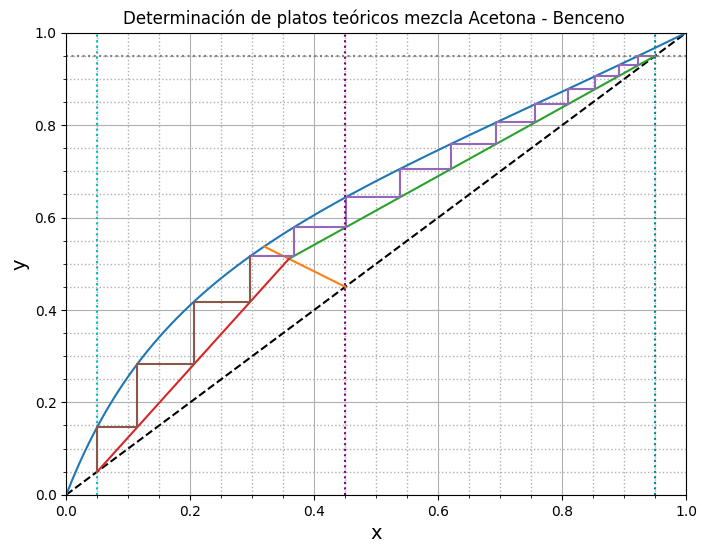

In [ ]:
comp1='Acetona'
comp2='Benceno'
# Acetona , Benceno
C1 = [4.215e+7, 4.536e+7]
C2 = [0.3397, 0.39053]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.05, 562.2]         # Temperatura crítica en K
pm = [58.08 , 78.114]       # Peso molecular
T = 273.15+66              # Temperatura del sistema en K

tF=66     #°C
tburbuja = 66
z=0.45 #Fracción de alimentación
F=75   # kmol/h
R=2.9 #Razón de reflujo
xD=0.95 #Pureza del destilado
xB=0.05 #Pureza de los fondos

#BALANCE DE MATERIA
B = ((F*z)-(F*xD))/(xB-xD)    # fondos
D = F-B                       # destilado

n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)

for i in range (n):
    Tr[i] = T/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)
    CL[i] = Hv[i]/4184

CL_prom = (z*CL[0]) + ((1-z)*CL[1])
PMF = 100 / ((z*100/pm[0])+(1-z)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
Lmda = CL_prom/PMF  # Calor latente de vaporización de la alimentación (cal/g)


q=0.4 #Se asgina q en función de la fracción de la alimentación que es líquida
# CÁLCULO DE PUNTO PINCH
#línea de referencia
if q==1:   #Líquido saturado
    xP=z
    alfa=np.polyval(alfa_coefx,xP)
    yP=(alfa*xP)/(1+xP*(alfa-1))

if q==0:   #Vapor saturado
    yP=z
    alfa=np.polyval(alfa_coefy,yP)
    xP=yP/(alfa-(yP*(alfa-1)))
#-----------------------------------
else:
    i=1
    xit=0
    tol=0.0005
    e=1
    while e>tol:
        alfa=np.polyval(alfa_coefx,xit)
        xP=((alfa-1)*(z+q)-alfa+(((alfa-1)*(z+q)-alfa)**2+(4*z*(alfa-1)*q))**0.5)/(2*(alfa-1)*q)
        yP=(alfa*xP)/(1+xP*(alfa-1))
        alfa1=np.polyval(alfa_coefx,xP)
        e=abs(alfa1-alfa)
        xit=xP
        i=i+1
#----------------------------------------

xpinch=[z,xP]
ypinch=[z,yP]

xint=(z*(R+1)+xD*(q-1))/(q*(R+1)-R*(q-1)) #Cálculo del punto de intersección
yint=(R*xint/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
S=(xint-xB)/(yint-xint) #Cálculo de la razón S


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor: %f kmol/h' %V)
print('Flujo de líquido: %f kmol/h' %L)


ms=(xD-yint)/(xD-xint)
xrec=np.linspace(xint,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms*xrec)+(xD/(R+1))
mi=(yint-xB)/(xint-xB)
xag=np.linspace(xB,xint,50) #Cálculo de la línea de operación de la zona de agotamiento
yag=(mi*xag)-(xB/S)


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0


while yr>yint: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XR[-2]
ya=YR[-2]
XA=np.array([xa])
YA=np.array([ya])




while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(mi*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch,ypinch)
plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(XR,YR)
axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch[0], color='purple', ls="dotted", label = 'XF')
axvline(xB, color='c', ls="dotted", label = 'XR')
plt.plot(XA,YA)

plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación: %i' %p_alim)

# **VAPOR SATURADO**

-0.0
Flujo del destilado: 33.333333 kmol/h
Flujo residual: 41.666667 kmol/h
Flujo de vapor: 55.000000 kmol/h
Flujo de líquido: 96.666667 kmol/h
Número de etapas: 16
Plato de alimentación: 12


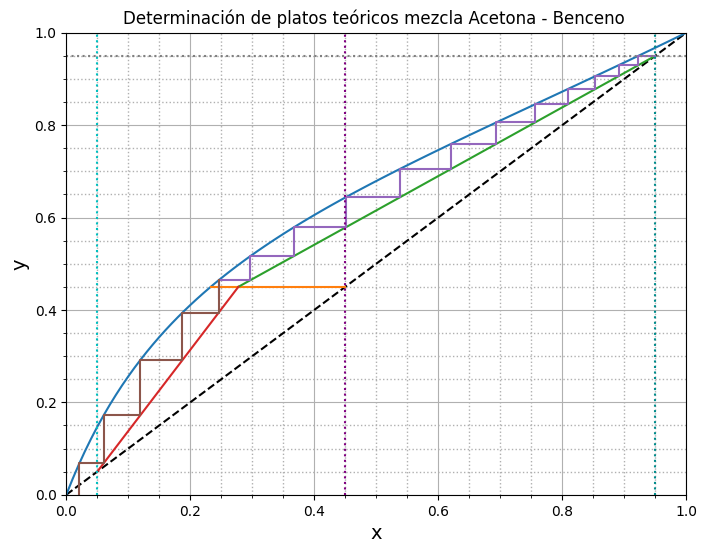

In [ ]:
comp1='Acetona'
comp2='Benceno'
# Acetona , Benceno
C1 = [4.215e+7, 4.536e+7]
C2 = [0.3397, 0.39053]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.05, 562.2]         # Temperatura crítica en K
pm = [58.08 , 78.114]       # Peso molecular
T = 273.15+66              # Temperatura del sistema en K

tF=66     #°C
tburbuja = 66
z=0.45 #Fracción de alimentación
F=75   # kmol/h
R=2.9 #Razón de reflujo
xD=0.95 #Pureza del destilado
xB=0.05 #Pureza de los fondos

#BALANCE DE MATERIA
B = ((F*z)-(F*xD))/(xB-xD)    # fondos
D = F-B                       # destilado

n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)

for i in range (n):
    Tr[i] = T/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)
    CL[i] = Hv[i]/4184

CL_prom = (z*CL[0]) + ((1-z)*CL[1])
PMF = 100 / ((z*100/pm[0])+(1-z)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
Lmda = CL_prom/PMF  # Calor latente de vaporización de la alimentación (cal/g)

def cp_acetona(T): # cal/g°C
  cof=[0.07196,2.01e-4,-1.278e-7,3.476e-11]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 1
  return (cp)
def cp_benceno(T):
  cof=[0.07406,3.295e-4,-2.52e-7,7.757e-11]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 2
  return (cp)

cp1 = cp_acetona(T)
cp2 = cp_benceno(T)
cptotal = (cp1+cp2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros


q = -((cptotal*(tF-tburbuja))/Lmda) #Cálculo de q para una alimentación de vapor
print(q)

# CÁLCULO DE PUNTO PINCH
#línea de referencia
if q==1:   #Líquido saturado
    xP=z
    alfa=np.polyval(alfa_coefx,xP)
    yP=(alfa*xP)/(1+xP*(alfa-1))

if q==0:   #Vapor saturado
    yP=z
    alfa=np.polyval(alfa_coefy,yP)
    xP=yP/(alfa-(yP*(alfa-1)))
#-----------------------------------
else:
    i=1
    xit=0
    tol=0.0005
    e=1
    while e>tol:
        alfa=np.polyval(alfa_coefx,xit)
        xP=((alfa-1)*(z+q)-alfa+(((alfa-1)*(z+q)-alfa)**2+(4*z*(alfa-1)*q))**0.5)/(2*(alfa-1)*q)
        yP=(alfa*xP)/(1+xP*(alfa-1))
        alfa1=np.polyval(alfa_coefx,xP)
        e=abs(alfa1-alfa)
        xit=xP
        i=i+1
#----------------------------------------

xpinch=[z,xP]
ypinch=[z,yP]

xint=(z*(R+1)+xD*(q-1))/(q*(R+1)-R*(q-1)) #Cálculo del punto de intersección
yint=(R*xint/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
S=(xint-xB)/(yint-xint) #Cálculo de la razón S


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor: %f kmol/h' %V)
print('Flujo de líquido: %f kmol/h' %L)


ms=(xD-yint)/(xD-xint)
xrec=np.linspace(xint,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms*xrec)+(xD/(R+1))
mi=(yint-xB)/(xint-xB)
xag=np.linspace(xB,xint,50) #Cálculo de la línea de operación de la zona de agotamiento
yag=(mi*xag)-(xB/S)


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0


while yr>yint: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XR[-2]
ya=YR[-2]
XA=np.array([xa])
YA=np.array([ya])




while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(mi*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch,ypinch)
plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(XR,YR)
axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch[0], color='purple', ls="dotted", label = 'XF')
axvline(xB, color='c', ls="dotted", label = 'XR')
plt.plot(XA,YA)

plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación: %i' %p_alim)

# **VAPOR SOBRECALENTADO**

-0.1706053554515424
Flujo del destilado: 33.333333 kmol/h
Flujo residual: 41.666667 kmol/h
Flujo de vapor: 42.204598 kmol/h
Flujo de líquido: 96.666667 kmol/h
Número de etapas: 17
Plato de alimentación: 13


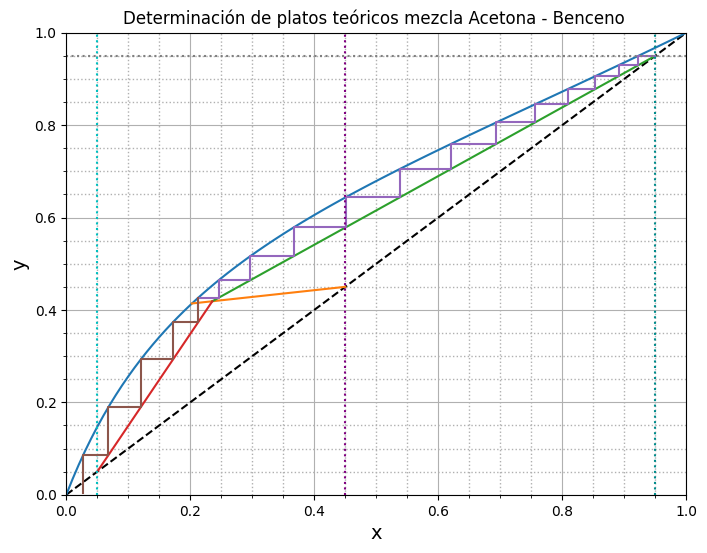

In [ ]:
comp1='Acetona'
comp2='Benceno'
# Acetona , Benceno
C1 = [4.215e+7, 4.536e+7]
C2 = [0.3397, 0.39053]
C3 = [0, 0]
C4 = [0, 0]
Tc = [562.05, 562.2]         # Temperatura crítica en K
pm = [58.08 , 78.114]       # Peso molecular
T = 273.15+100              # Temperatura del sistema en K
tF=100   #°C
tburbuja = 66
z=0.45 #Fracción de alimentación
F=75   # kmol/h
R=2.9 #Razón de reflujo
xD=0.95 #Pureza del destilado
xB=0.05 #Pureza de los fondos

#BALANCE DE MATERIA
B = ((F*z)-(F*xD))/(xB-xD)    # fondos
D = F-B                       # destilado

n = len(C1)
Hv = np.zeros(n)
CL = np.zeros(n)
Tr = np.zeros(n)

for i in range (n):
    Tr[i] = T/Tc[i]
    Hv[i] = C1[i]*(1-Tr[i])**(C2[i] + C3[i]*Tr[i] + C4[i]*Tr[i]**2)
    CL[i] = Hv[i]/4184

CL_prom = (z*CL[0]) + ((1-z)*CL[1])
PMF = 100 / ((z*100/pm[0])+(1-z)*100/pm[1]) #Cálculo del peso molecular promedio de la mezcla
Lmda = CL_prom/PMF  # Calor latente de vaporización de la alimentación (cal/g)

def cp_acetona(T): # cal/g°C
  cof=[0.07196,2.01e-4,-1.278e-7,3.476e-11]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[0]*0.0042) #Polinomios Cp del componente 1
  return (cp)
def cp_benceno(T):
  cof=[0.07406,3.295e-4,-2.52e-7,7.757e-11,0]
  cp=(cof[0]+(cof[1]*T)+(cof[2]*(T**2))+(cof[3]*(T**3)))/(pm[1]*0.0042) #Polinomios Cp del componente 2
  return (cp)

cp1 = cp_acetona(T)
cp2 = cp_benceno(T)
cptotal = (cp1+cp2)/2 #Se obtiene el Cp de la mezcla al promediar el Cp de los componentes puros


q = -((cptotal*(tF-tburbuja))/Lmda) #Cálculo de q para una alimentación de vapor
print(q)

# CÁLCULO DE PUNTO PINCH
#línea de referencia
if q==1:   #Líquido saturado
    xP=z
    alfa=np.polyval(alfa_coefx,xP)
    yP=(alfa*xP)/(1+xP*(alfa-1))

if q==0:   #Vapor saturado
    yP=z
    alfa=np.polyval(alfa_coefy,yP)
    xP=yP/(alfa-(yP*(alfa-1)))
#-----------------------------------
else:
    i=1
    xit=0
    tol=0.0005
    e=1
    while e>tol:
        alfa=np.polyval(alfa_coefx,xit)
        xP=((alfa-1)*(z+q)-alfa+(((alfa-1)*(z+q)-alfa)**2+(4*z*(alfa-1)*q))**0.5)/(2*(alfa-1)*q)
        yP=(alfa*xP)/(1+xP*(alfa-1))
        alfa1=np.polyval(alfa_coefx,xP)
        e=abs(alfa1-alfa)
        xit=xP
        i=i+1
#----------------------------------------

xpinch=[z,xP]
ypinch=[z,yP]

xint=(z*(R+1)+xD*(q-1))/(q*(R+1)-R*(q-1)) #Cálculo del punto de intersección
yint=(R*xint/(R+1))+(xD/(R+1)) #Cálculo de la coordenada y de intersección a partir de la línea de operación de rectificación
S=(xint-xB)/(yint-xint) #Cálculo de la razón S


V=S*B #V: Vapor, #S: Razón de recirculación Reboiler, #B: Flujo de fondos
L=R*D #L: Líquido #R: Razón de reflujo condensador  #D: Flujo de destilado

print('Flujo del destilado: %f kmol/h' %D)
print('Flujo residual: %f kmol/h' %B)
print('Flujo de vapor: %f kmol/h' %V)
print('Flujo de líquido: %f kmol/h' %L)


ms=(xD-yint)/(xD-xint)
xrec=np.linspace(xint,xD,50) #Cálculo de la línea de operación de la zona de rectificación
yrec=(ms*xrec)+(xD/(R+1))
mi=(yint-xB)/(xint-xB)
xag=np.linspace(xB,xint,50) #Cálculo de la línea de operación de la zona de agotamiento
yag=(mi*xag)-(xB/S)


xr=xD
yr=xD
XR=np.array([xr])
YR=np.array([yr])
i=0


while yr>yint: #Se pone de condición el punto de intersección donde debe frenarse este ciclo
    alfa=np.polyval(alfa_coefy,yr)
    xr=yr/(alfa-yr*(alfa-1)) #Se calcula el número de platos evaluando el punto de intersección del ajuste de datos de equilibrio en "x"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)
    yr=(ms*xr)+(xD/(R+1)) #Se evalúa el punto de intersección con la línea de operación de rectificación para encontrar "y"
    XR=np.append(XR,xr)
    YR=np.append(YR,yr)

    i=i+1
    #xr=XR[i]
    #yr=YR[i]

p_alim=i #Se pone un contador del número de platos para determinar el plato de alimentación
xa=XR[-2]
ya=YR[-2]
XA=np.array([xa])
YA=np.array([ya])




while ya>xB: #Se pone de condición para frenar el ciclo, que el cálculo se haga entre el punto de intersección y la fracción de componente en los fondos
    ya=(mi*xa)-(xB/S) #Se empieza calculando "y" al evaluar la línea de operación de agotamiento
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    if ya<xB:
        break
    alfa=np.polyval(alfa_coefy,ya) #Posterior a ello, se evalúa el ajuste de datos de equilibrio para encontrar "x"
    xa=ya/(alfa-ya*(alfa-1))
    XA=np.append(XA,xa)
    YA=np.append(YA,ya)
    i=i+1 #Se contínua contando en  no. de platos hasta finalizar el ciclo

plt.figure(1,figsize=(8,6))
plt.plot(x,x,'k--')
plt.plot(x,y)
plt.plot(xpinch,ypinch)
plt.plot(xrec,yrec)
plt.plot(xag,yag)
plt.plot(XR,YR)
axhline(xD, color='gray', ls="dotted", label = 'YD')
axvline(xD, color='darkcyan', ls="dotted", label = 'XD')
axvline(xpinch[0], color='purple', ls="dotted", label = 'XF')
axvline(xB, color='c', ls="dotted", label = 'XR')
plt.plot(XA,YA)

plt.title('Determinación de platos teóricos mezcla %s - %s ' %(comp1,comp2))
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.minorticks_on()
plt.grid( which='minor',linestyle='dotted', linewidth=1)
plt.grid(which='major')
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('torre1.png')


print('Número de etapas: %i' %i)
print('Plato de alimentación: %i' %p_alim)